In [20]:
!pip install lxml

  Using cached lxml-5.3.2-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.6 kB)
Using cached lxml-5.3.2-cp310-cp310-manylinux_2_28_x86_64.whl (5.2 MB)


In [22]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

# Trying to compile sea surface temperature data

# Bodega Marine Laboratory BML Buoy 

[https://erddap.cencoos.org/erddap/tabledap/bodega-marine-laboratory-bml-.html]

- **Missing important years**

In [1]:
import pandas as pd

url = 'https://erddap.cencoos.org/erddap/tabledap/bodega-marine-laboratory-bml-.csv'
url_cols = 'time,sea_water_temperature'
param = 'time>=2004-01-01T00:00:00Z'
water_df = pd.read_csv(url+'?'+url_cols+'&'+param)


print(water_df.head())


                   time sea_water_temperature
0                   UTC        degree_Celsius
1  2004-09-17T02:00:00Z              11.94485
2  2004-09-17T14:00:00Z                11.937
3  2004-09-18T05:00:00Z              11.96045
4  2004-09-18T17:00:00Z                 11.99


In [2]:
water_df = water_df.iloc[1:,:]
water_df

,time,sea_water_temperature
1,2004-09-17T02:00:00Z,11.94485
2,2004-09-17T14:00:00Z,11.937
3,2004-09-18T05:00:00Z,11.96045
4,2004-09-18T17:00:00Z,11.99
5,2004-09-19T05:00:00Z,11.99745
...,...,...
20592,2018-11-13T16:00:00Z,12.05135
20593,2018-11-13T17:00:00Z,12.0473666667
20594,2018-11-13T18:00:00Z,12.10994
20595,2018-11-13T19:00:00Z,12.199275


In [3]:
water_df_copy = water_df.copy()

In [4]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20596 entries, 1 to 20596
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   time                   20596 non-null  object
 1   sea_water_temperature  20596 non-null  object
dtypes: object(2)
memory usage: 321.9+ KB


In [5]:
water_df.rename(columns={'time':'date','sea_water_temperature':'sea_water_temp_degC'}, inplace=True)

In [6]:
water_df['sea_water_temp_degC'] = water_df['sea_water_temp_degC'].astype(float)
water_df['date'] = pd.to_datetime(water_df.date)
water_df

,date,sea_water_temp_degC
1,2004-09-17 02:00:00+00:00,11.944850
2,2004-09-17 14:00:00+00:00,11.937000
3,2004-09-18 05:00:00+00:00,11.960450
4,2004-09-18 17:00:00+00:00,11.990000
5,2004-09-19 05:00:00+00:00,11.997450
...,...,...
20592,2018-11-13 16:00:00+00:00,12.051350
20593,2018-11-13 17:00:00+00:00,12.047367
20594,2018-11-13 18:00:00+00:00,12.109940
20595,2018-11-13 19:00:00+00:00,12.199275


In [7]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20596 entries, 1 to 20596
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   date                 20596 non-null  datetime64[ns, UTC]
 1   sea_water_temp_degC  20596 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 321.9 KB


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='date', ylabel='sea_water_temp_degC'>

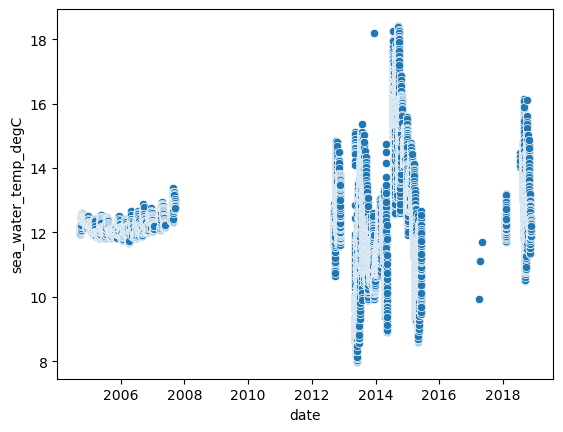

In [9]:
sns.scatterplot(data=water_df, x='date', y='sea_water_temp_degC')

# 235 - Fort Bragg South, CA (46263)
https://erddap.cencoos.org/erddap/tabledap/edu_ucsd_cdip_235.html

In [10]:
import pandas as pd

url = 'https://erddap.cencoos.org/erddap/tabledap/edu_ucsd_cdip_235.csv'
url_col = '?time,sea_water_temperature'
param = '&time%3E%3D2007-01-01T00%3A00%3A00Z'

fort_temp_df = pd.read_csv(url+url_col+param)


print(fort_temp_df.head())


                   time sea_water_temperature
0                   UTC        degree_Celsius
1  2017-09-28T10:00:00Z                   NaN
2  2017-09-28T10:28:20Z         12.6499996185
3  2017-09-28T10:30:00Z                   NaN
4  2017-09-28T10:58:20Z         12.6499996185


In [11]:
fort_temp_df = fort_temp_df.iloc[1:,:]
fort_temp_df

,time,sea_water_temperature
1,2017-09-28T10:00:00Z,NaN
2,2017-09-28T10:28:20Z,12.6499996185
3,2017-09-28T10:30:00Z,NaN
4,2017-09-28T10:58:20Z,12.6499996185
5,2017-09-28T11:00:00Z,NaN
...,...,...
34812,2018-09-26T03:58:20Z,13.2999992371
34813,2018-09-26T04:00:00Z,NaN
34814,2018-09-26T04:28:20Z,13.3999996185
34815,2018-09-26T04:30:00Z,NaN


In [12]:
fort_temp_df.dropna(axis=0, inplace = True)
fort_temp_df
## drop them instead of ffill to shorten dataframe 

,time,sea_water_temperature
2,2017-09-28T10:28:20Z,12.6499996185
4,2017-09-28T10:58:20Z,12.6499996185
6,2017-09-28T11:28:20Z,12.5499992371
8,2017-09-28T11:58:20Z,12.5499992371
10,2017-09-28T12:28:20Z,12.6000003815
...,...,...
34808,2018-09-26T02:58:20Z,13.2999992371
34810,2018-09-26T03:28:20Z,13.2999992371
34812,2018-09-26T03:58:20Z,13.2999992371
34814,2018-09-26T04:28:20Z,13.3999996185


In [13]:
fort_temp_df.dtypes

time                     object
sea_water_temperature    object
dtype: object

In [14]:
fort_temp_df['sea_water_temperature'] = fort_temp_df.sea_water_temperature.astype(float)
fort_temp_df['time'] = pd.to_datetime(fort_temp_df.time)

In [15]:
fort_temp_df

,time,sea_water_temperature
2,2017-09-28 10:28:20+00:00,12.650000
4,2017-09-28 10:58:20+00:00,12.650000
6,2017-09-28 11:28:20+00:00,12.549999
8,2017-09-28 11:58:20+00:00,12.549999
10,2017-09-28 12:28:20+00:00,12.600000
...,...,...
34808,2018-09-26 02:58:20+00:00,13.299999
34810,2018-09-26 03:28:20+00:00,13.299999
34812,2018-09-26 03:58:20+00:00,13.299999
34814,2018-09-26 04:28:20+00:00,13.400000


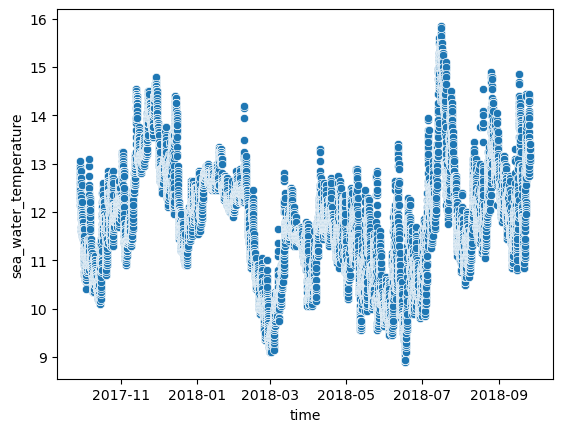

In [16]:
sns.scatterplot(fort_temp_df, x='time',y='sea_water_temperature');


In [32]:
url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/NOAA_DHW_monthly.htmlTable?sea_surface_temperature%5B(2006-01-16T00:00:00Z):(2025-03-16T00:00:00Z)%5D%5B(39.525)%5D%5B(-123.975)%5D&.draw=lines&.vars=time%7Csea_surface_temperature%7C&.color=0x000000&.bgColor=0xffccccff'
griddap_data = requests.get(url)
griddap_data.status_code

200

In [45]:
df = pd.read_html(griddap_data.text)[1]
df 

,time,latitude,longitude,sea_surface_temperature
,UTC,degrees_north,degrees_east,degree_C
0,2006-01-16T00:00:00Z,39.525,-123.975,12.33
1,2006-02-16T00:00:00Z,39.525,-123.975,11.32
2,2006-03-16T00:00:00Z,39.525,-123.975,11.00
3,2006-04-15T23:00:00Z,39.525,-123.975,11.45
4,2006-05-15T23:00:00Z,39.525,-123.975,10.73
...,...,...,...,...
226,2024-11-16T00:00:00Z,39.525,-123.975,12.76
227,2024-12-16T00:00:00Z,39.525,-123.975,12.69
228,2025-01-16T00:00:00Z,39.525,-123.975,11.66


In [46]:
df.dtypes

time                     UTC               object
latitude                 degrees_north    float64
longitude                degrees_east     float64
sea_surface_temperature  degree_C         float64
dtype: object

In [47]:
df.columns = [i[0]+'_'+i[1] for i in df.columns]

In [48]:
df['time_UTC'] = pd.to_datetime(df.time_UTC)
df.dtypes

time_UTC                            datetime64[ns, UTC]
latitude_degrees_north                          float64
longitude_degrees_east                          float64
sea_surface_temperature_degree_C                float64
dtype: object

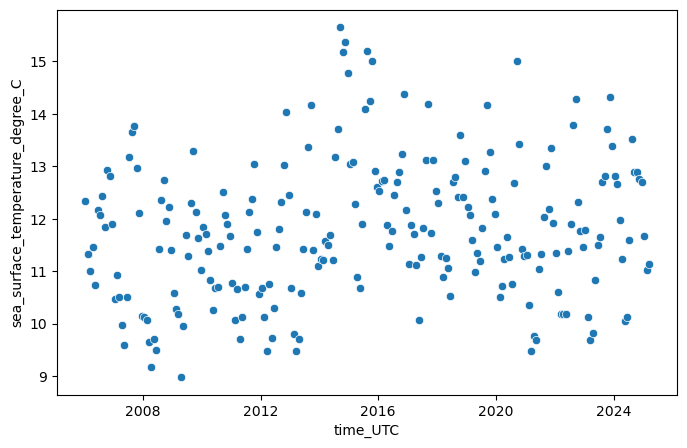

In [49]:
plt.figure(figsize=(8,5))

sns.scatterplot(df, x='time_UTC', y='sea_surface_temperature_degree_C')

plt.show()

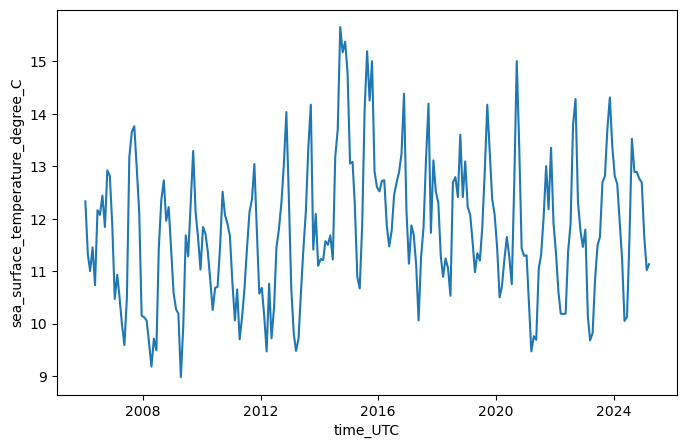

In [50]:
plt.figure(figsize=(8,5))

sns.lineplot(df, x='time_UTC', y='sea_surface_temperature_degree_C')

plt.show()

In [51]:
df.time_UTC

0     2006-01-16 00:00:00+00:00
1     2006-02-16 00:00:00+00:00
2     2006-03-16 00:00:00+00:00
3     2006-04-15 23:00:00+00:00
4     2006-05-15 23:00:00+00:00
                 ...           
226   2024-11-16 00:00:00+00:00
227   2024-12-16 00:00:00+00:00
228   2025-01-16 00:00:00+00:00
229   2025-02-16 00:00:00+00:00
230   2025-03-16 00:00:00+00:00
Name: time_UTC, Length: 231, dtype: datetime64[ns, UTC]

In [52]:
sst_anomaly_url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/NOAA_DHW_monthly.htmlTable?sea_surface_temperature_anomaly%5B(2006-01-16T00:00:00Z):(2025-03-16T00:00:00Z)%5D%5B(39.525)%5D%5B(-123.975)%5D&.draw=lines&.vars=time%7Csea_surface_temperature_anomaly%7C&.color=0x000000&.bgColor=0xffccccff'
sst_anomaly_data = requests.get(sst_anomaly_url)
sst_anomaly_data.status_code

200

In [53]:
sst_anomaly_df = pd.read_html(sst_anomaly_data.text)[1]
sst_anomaly_df 

,time,latitude,longitude,sea_surface_temperature_anomaly
,UTC,degrees_north,degrees_east,degree_C
0,2006-01-16T00:00:00Z,39.525,-123.975,0.89
1,2006-02-16T00:00:00Z,39.525,-123.975,0.00
2,2006-03-16T00:00:00Z,39.525,-123.975,-0.19
3,2006-04-15T23:00:00Z,39.525,-123.975,0.45
4,2006-05-15T23:00:00Z,39.525,-123.975,-0.39
...,...,...,...,...
226,2024-11-16T00:00:00Z,39.525,-123.975,0.58
227,2024-12-16T00:00:00Z,39.525,-123.975,0.94
228,2025-01-16T00:00:00Z,39.525,-123.975,0.21


In [54]:
sst_anomaly_df.columns = [i[0]+'_'+i[1] for i in sst_anomaly_df.columns]

sst_anomaly_df['time_UTC'] = pd.to_datetime(sst_anomaly_df.time_UTC)
sst_anomaly_df.dtypes

time_UTC                                    datetime64[ns, UTC]
latitude_degrees_north                                  float64
longitude_degrees_east                                  float64
sea_surface_temperature_anomaly_degree_C                float64
dtype: object

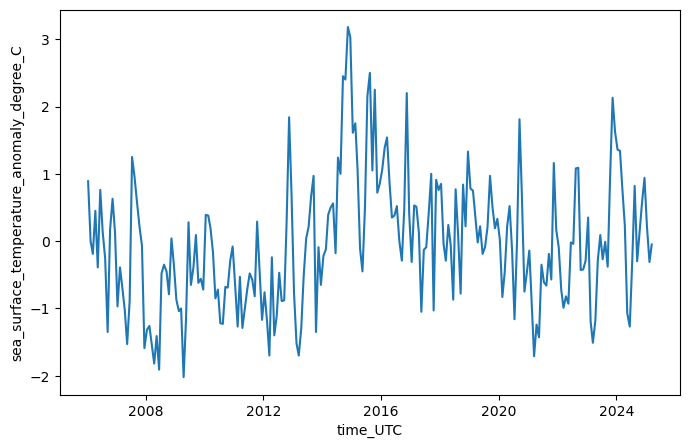

In [56]:
plt.figure(figsize=(8,5))

sns.lineplot(sst_anomaly_df, x='time_UTC', y='sea_surface_temperature_anomaly_degree_C')

plt.show()

In [58]:
begin_anomaly_url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/NOAA_DHW_monthly.htmlTable?sea_surface_temperature_anomaly%5B(1985-01-16T00:00:00Z):(2025-03-16T00:00:00Z)%5D%5B(39.525)%5D%5B(-123.975)%5D&.draw=lines&.vars=time%7Csea_surface_temperature_anomaly%7C&.color=0x000000&.bgColor=0xffccccff'
begin_anomaly_data = requests.get(begin_anomaly_url)

begin_anomaly_df = pd.read_html(begin_anomaly_data.text)[1]

begin_anomaly_df.columns = [i[0]+'_'+i[1] for i in begin_anomaly_df.columns]

begin_anomaly_df['time_UTC'] = pd.to_datetime(begin_anomaly_df.time_UTC)
begin_anomaly_df.dtypes

time_UTC                                    datetime64[ns, UTC]
latitude_degrees_north                                  float64
longitude_degrees_east                                  float64
sea_surface_temperature_anomaly_degree_C                float64
dtype: object

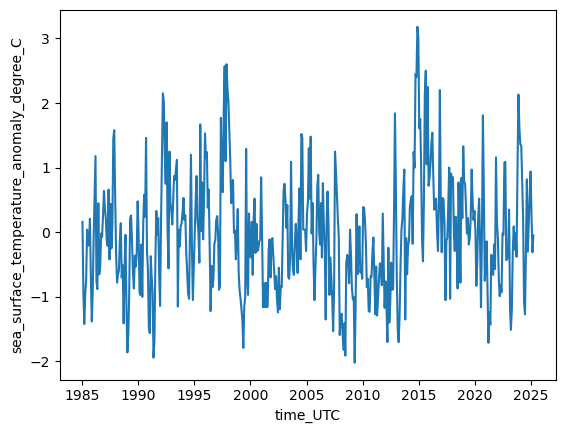

In [60]:
sns.lineplot(begin_anomaly_df, x='time_UTC', y='sea_surface_temperature_anomaly_degree_C')
plt.show()